# Snow and Ice inversion
This notebook has the objective of constructing a pipeline for the inverison and calculation of the means for the snow and ice problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

## Global Parameters

In [2]:
MINLON=60.0
MAXLON=88.0
MINLAT=-180.0
MAXLAT=178.5

## Inversion using Voronoi (single thread?)

In [3]:
subprocess.run("ls")

DataCleaning.ipynb
PipelineSyntheticData.ipynb
SnowIcePipeline.ipynb
generateislandtemplatepoints.py
generatesdftemplatepoints.py
results_50_50_50_vv
test.npy


CompletedProcess(args='ls', returncode=0)

In [30]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_C = 10
parameter_T = 10
iterations_number = 100
verbosity = 100000
independent_chains = 1  # Number of independent chains to run at each temperature
temperature_levels = 1 # Number of temperatures for parallel tempering 
max_temperature = 5.0      # Maximum temperature for the parallel tampering log temperature scale
iterations_between_tempering = 10  # Number of iteration between parallel tempering exchange attempts

In [6]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../tideshmcpt", "-i", "../snow_ice_observations.txt", "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON),
                "-A", str(parametrization), "-A", str(parametrization),
                "-C", str(parameter_C), "-T", str(parameter_T),
                "-c", str(independent_chains),
                "-t", str(iterations_number), "-v", str(verbosity),
                "-K", str(temperature_levels), "-m", str(max_temperature),
                "-e", str(iterations_between_tempering)])

CompletedProcess(args=['mpirun', '-np', '1', '../tideshmcpt', '-i', '../snow_ice_observations.txt', '-o', '../results_50_50_50_vv/', '-P', '../tas_synthetic/prior_sea.txt', '-P', '../tas_synthetic/prior_land.txt', '-M', '../tas_synthetic/positionprior_sea.txt', '-M', '../tas_synthetic/positionprior_land.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-C', '10', '-T', '10', '-c', '1', '-t', '100', '-v', '10', '-K', '1', '-m', '5.0', '-e', '10'], returncode=0)

In [31]:
subprocess.run(["../tideshmc", 
                "-i", "../snow_ice_observations.txt", 
                "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON),
                "-A", str(parametrization), "-A", str(parametrization),
                "-t", str(iterations_number), 
                "-v", str(verbosity)])




'''
mkdir -p results_franke
../hmc -i syntheticobs_franke.txt \
  -P priorproposal.txt \
  -M positionpriorproposal.txt \
  -H hierarchicalpriorproposal.txt \
  -o results_franke/ \
  -v 1000 \
  -t 100000 \
  -A 0 \
  -x 0.0 -X 1.0 \
  -y 0.0 -Y 1.0
'''

 Initial likelihood: 8899342.747054 -12903.422363
Optimized likelihood: 12799.121693 -12903.422363
Optimization AR     :   0.008900


2022-01-07 23:17:09:info:./global.hpp:optimize_sa: 481:Model 0 Mean   0.367695
2022-01-07 23:17:09:info:./global.hpp:optimize_sa: 481:Model 1 Mean   0.367695


'\nmkdir -p results_franke\n../hmc -i syntheticobs_franke.txt   -P priorproposal.txt   -M positionpriorproposal.txt   -H hierarchicalpriorproposal.txt   -o results_franke/   -v 1000   -t 100000   -A 0   -x 0.0 -X 1.0   -y 0.0 -Y 1.0\n'

## Compute Means (single thread?)

In [9]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 0
parameter_s = 500000
parameter_t = 10

In [10]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_freeboard.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_freeboard.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-I', '0', '-s', '500000', '-t', '10'], returncode=0)

In [23]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 1
parameter_s = 500000
parameter_t = 10

In [24]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_ak.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_ak.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-I', '1', '-s', '500000', '-t', '10'], returncode=0)

In [25]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_s = 500000
parameter_t = 10

In [26]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_tide_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_snow.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-s", str(parameter_s), "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_tide_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_snow.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-s', '500000', '-t', '10'], returncode=0)

## Visualize Means

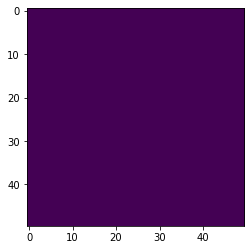

In [27]:
res = np.loadtxt("../results_50_50_50_vv/mean_freeboard.txt")
plt.imshow(res)

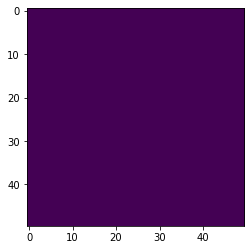

In [28]:
res = np.loadtxt("../results_50_50_50_vv/mean_ak.txt")
plt.imshow(res)

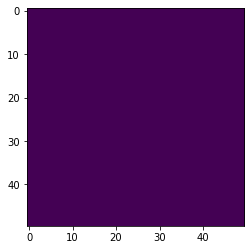

In [29]:
res = np.loadtxt("../results_50_50_50_vv/mean_snow.txt")
plt.imshow(res)

# Single Thread

## Inversion using Voronoi 

In [3]:
subprocess.run("ls")

DataCleaning.ipynb
PipelineSyntheticData.ipynb
SnowIcePipeline.ipynb
generateislandtemplatepoints.py
generatesdftemplatepoints.py
results_50_50_50_vv
test.npy


CompletedProcess(args='ls', returncode=0)

In [30]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_C = 10
parameter_T = 10
iterations_number = 100
verbosity = 100000
independent_chains = 1  # Number of independent chains to run at each temperature
temperature_levels = 1 # Number of temperatures for parallel tempering 
max_temperature = 5.0      # Maximum temperature for the parallel tampering log temperature scale
iterations_between_tempering = 10  # Number of iteration between parallel tempering exchange attempts

In [31]:
subprocess.run(["../tideshmc", 
                "-i", "../snow_ice_observations.txt", 
                "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON),
                "-A", str(parametrization), "-A", str(parametrization),
                "-t", str(iterations_number), 
                "-v", str(verbosity)])

 Initial likelihood: 8899342.747054 -12903.422363
Optimized likelihood: 12799.121693 -12903.422363
Optimization AR     :   0.008900


2022-01-07 23:17:09:info:./global.hpp:optimize_sa: 481:Model 0 Mean   0.367695
2022-01-07 23:17:09:info:./global.hpp:optimize_sa: 481:Model 1 Mean   0.367695


'\nmkdir -p results_franke\n../hmc -i syntheticobs_franke.txt   -P priorproposal.txt   -M positionpriorproposal.txt   -H hierarchicalpriorproposal.txt   -o results_franke/   -v 1000   -t 100000   -A 0   -x 0.0 -X 1.0   -y 0.0 -Y 1.0\n'

## Compute Means 

In [9]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 0
parameter_s = 500000
parameter_t = 10

In [10]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_freeboard.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_freeboard.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-I', '0', '-s', '500000', '-t', '10'], returncode=0)

In [23]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 1
parameter_s = 500000
parameter_t = 10

In [24]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_ak.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_ak.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-I', '1', '-s', '500000', '-t', '10'], returncode=0)

In [25]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_s = 500000
parameter_t = 10

In [26]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_tide_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_snow.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-s", str(parameter_s), "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_tide_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_snow.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-s', '500000', '-t', '10'], returncode=0)

## Visualize Means

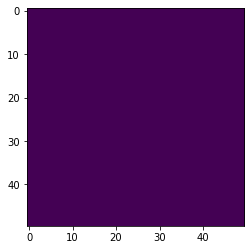

In [27]:
res = np.loadtxt("../results_50_50_50_vv/mean_freeboard.txt")
plt.imshow(res)

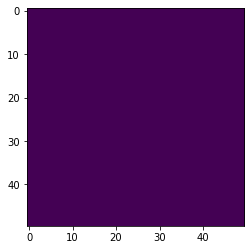

In [28]:
res = np.loadtxt("../results_50_50_50_vv/mean_ak.txt")
plt.imshow(res)

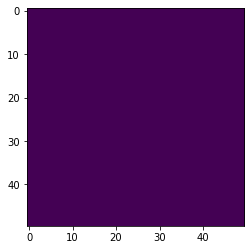

In [29]:
res = np.loadtxt("../results_50_50_50_vv/mean_snow.txt")
plt.imshow(res)

In [ ]:
## Inversion using Voronoi (single thread?)

subprocess.run("ls")

number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_C = 10
parameter_T = 10
iterations_number = 100
verbosity = 100000
independent_chains = 1  # Number of independent chains to run at each temperature
temperature_levels = 1 # Number of temperatures for parallel tempering 
max_temperature = 5.0      # Maximum temperature for the parallel tampering log temperature scale
iterations_between_tempering = 10  # Number of iteration between parallel tempering exchange attempts

subprocess.run(["mpirun", "-np", str(number_of_processes), "../tideshmcpt", "-i", "../snow_ice_observations.txt", "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON),
                "-A", str(parametrization), "-A", str(parametrization),
                "-C", str(parameter_C), "-T", str(parameter_T),
                "-c", str(independent_chains),
                "-t", str(iterations_number), "-v", str(verbosity),
                "-K", str(temperature_levels), "-m", str(max_temperature),
                "-e", str(iterations_between_tempering)])

subprocess.run(["../tideshmc", 
                "-i", "../snow_ice_observations.txt", 
                "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON),
                "-A", str(parametrization), "-A", str(parametrization),
                "-t", str(iterations_number), 
                "-v", str(verbosity)])




'''
mkdir -p results_franke
../hmc -i syntheticobs_franke.txt \
  -P priorproposal.txt \
  -M positionpriorproposal.txt \
  -H hierarchicalpriorproposal.txt \
  -o results_franke/ \
  -v 1000 \
  -t 100000 \
  -A 0 \
  -x 0.0 -X 1.0 \
  -y 0.0 -Y 1.0
'''

## Compute Means (single thread?)

number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 0
parameter_s = 500000
parameter_t = 10

subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_freeboard.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 1
parameter_s = 500000
parameter_t = 10

subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_ak.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_s = 500000
parameter_t = 10

subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_tide_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_snow.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-s", str(parameter_s), "-t", str(parameter_t)])

## Visualize Means

res = np.loadtxt("../results_50_50_50_vv/mean_freeboard.txt")
plt.imshow(res)

res = np.loadtxt("../results_50_50_50_vv/mean_ak.txt")
plt.imshow(res)

res = np.loadtxt("../results_50_50_50_vv/mean_snow.txt")
plt.imshow(res)